## 1) Regression discontinuity: banking recovery

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [5]:
file_path = (r"C:\Users\Vignesh\Desktop\bank_data.csv")
df = pd.read_csv(file_path)

In [13]:
print(df.head())

     id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
0  2030                       194                 263.540  Level 0 Recovery   
1  1150                       486                 416.090  Level 0 Recovery   
2   380                       527                 429.350  Level 0 Recovery   
3  1838                       536                 296.990  Level 0 Recovery   
4  1995                       541                 346.385  Level 0 Recovery   

   age     sex  above_threshold  
0   19    Male                0  
1   25  Female                0  
2   27    Male                0  
3   25    Male                0  
4   34    Male                0  


In [20]:
print(df.isnull().sum())

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
above_threshold             0
dtype: int64


In [21]:
# Display the data types of each column in the DataFrame
print(df.dtypes)

id                            int64
expected_recovery_amount      int64
actual_recovery_amount      float64
recovery_strategy            object
age                           int64
sex                          object
above_threshold               int32
dtype: object


In [16]:
# Initialize lists to store results
threshold_values = []
extra_amounts = []

In [17]:
# Define the threshold for recovery strategy levels
thresholds = [1000, 2000, 3000, 4000]

In [18]:
for threshold in thresholds:
    # Create a binary variable indicating whether the recovery amount is above the threshold
    df['above_threshold'] = (df['expected_recovery_amount'] > threshold).astype(int)

    # Fit a linear regression model
    slope, intercept, _, _, _ = linregress(df['expected_recovery_amount'], df['actual_recovery_amount'])

    # Calculate the extra amount recovered at the higher strategy level
    extra_amount = slope * threshold

    # Append results to lists
    threshold_values.append(threshold)
    extra_amounts.append(extra_amount)

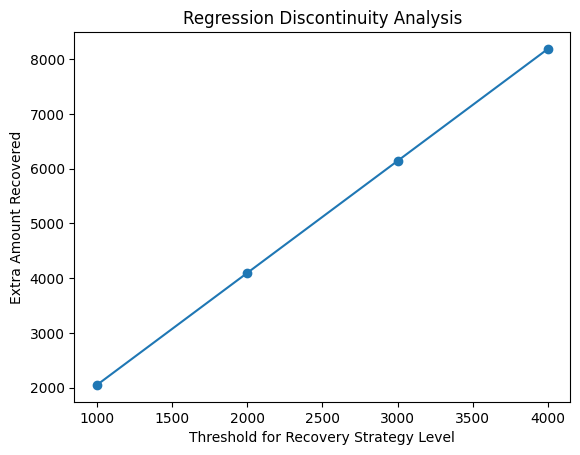

In [19]:
# Visualize the results
plt.plot(threshold_values, extra_amounts, marker='o')
plt.xlabel('Threshold for Recovery Strategy Level')
plt.ylabel('Extra Amount Recovered')
plt.title('Regression Discontinuity Analysis')
plt.show()

#### The graph visualizes the relationship between recovery strategy thresholds and the extra amount recovered. If there's a noticeable jump in extra recovery beyond
####  $50 (additional cost for higher strategies), it suggests the effectiveness of higher-cost strategies in recouping more than the incurred cost, validating the strategy's financial viability.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2) Graphical exploratory data analysis

In [25]:
# Define the window for Expected Recovery Amount ($0 to $2000)
window_start = 0
window_end = 2000

# Filter data within the specified window
filtered_data = df[(df['expected_recovery_amount'] > window_start) & (df['expected_recovery_amount'] <= window_end)]

In [30]:
# Define the levels and thresholds
level_0_start = 0
level_0_end = 1000
level_1_start = 1001
level_1_end = 2000

# Filter data for Level 0
level_0_data = df[(df['expected_recovery_amount'] > level_0_start) & (df['expected_recovery_amount'] <= level_0_end)]

# Filter data for Level 1
level_1_data = df[(df['expected_recovery_amount'] > level_1_start) & (df['expected_recovery_amount'] <= level_1_end)]

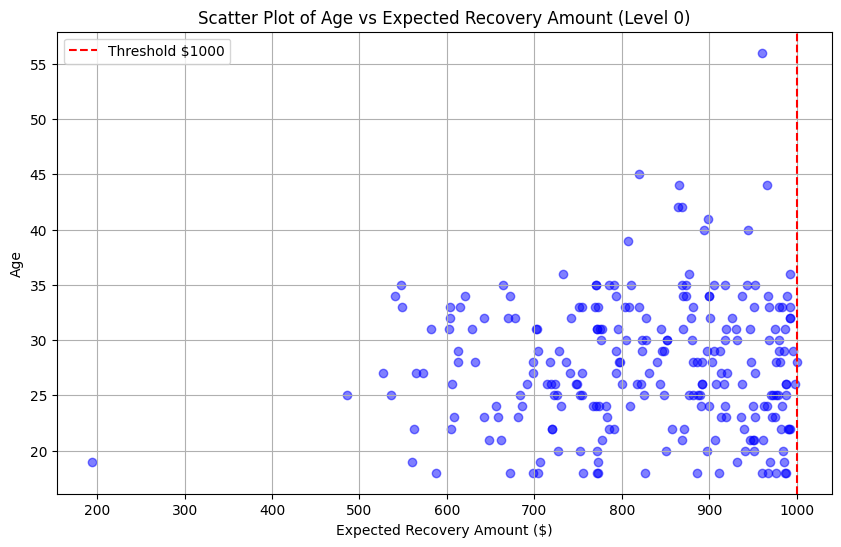

In [31]:
# Create scatter plot for Level 0
plt.figure(figsize=(10, 6))
plt.scatter(level_0_data['expected_recovery_amount'], level_0_data['age'], alpha=0.5, color='blue')
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold $1000')
plt.title('Scatter Plot of Age vs Expected Recovery Amount (Level 0)')
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

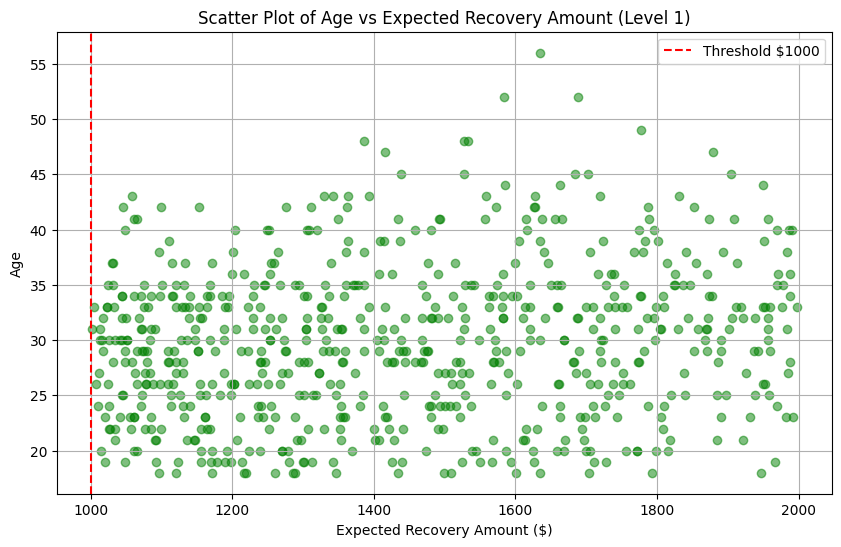

In [33]:
# Create scatter plot for Level 1
plt.figure(figsize=(10, 6))
plt.scatter(level_1_data['expected_recovery_amount'], level_1_data['age'], alpha=0.5, color='green')
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold $1000')
plt.title('Scatter Plot of Age vs Expected Recovery Amount (Level 1)')
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

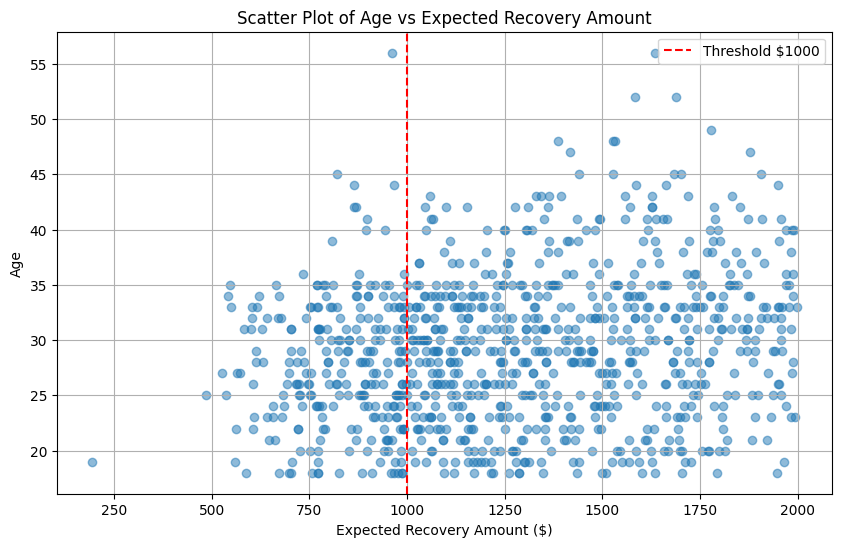

In [28]:
# Create a scatter plot for Age vs Expected Recovery Amount
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['age'], alpha=0.5)
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold $1000')
plt.title('Scatter Plot of Age vs Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

#### The red dashed line indicates the $1000 threshold. Analyzing the plot can reveal whether there's a noticeable jump in customer age around the threshold.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## 3) Statistical test: age vs. expected recovery amount

#### To perform a statistical test comparing the average age of customers just above and just below the $1000 Expected Recovery Amount threshold, we can conduct a t-test.

In [37]:
import pandas as pd
from scipy.stats import ttest_ind

In [38]:
# Define the threshold
threshold = 1000

# Define the range around the threshold
lower_range = 900
upper_range = 1100

# Filter data for customers just above and just below the threshold
above_threshold = df[(df['expected_recovery_amount'] > threshold) & (df['expected_recovery_amount'] <= upper_range)]
below_threshold = df[(df['expected_recovery_amount'] <= threshold) & (df['expected_recovery_amount'] >= lower_range)]

In [39]:
# Perform t-test for age
t_stat, p_value = ttest_ind(above_threshold['age'], below_threshold['age'], equal_var=False)

In [40]:
# Display the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: 1.6090357512691353
P-Value: 0.10938147433215122


In [41]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average age.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average age.")

Fail to reject the null hypothesis: There is no significant difference in average age.


##### the data for customers within the specified range around the $1000 threshold, performs a t-test for age between the two groups (above and below the threshold), and then interprets the results. A significant difference in average age would suggest a potential systematic difference that needs to be considered in the analysis.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 4) Statistical test: sex vs. expected recovery amount

### To perform a statistical test comparing the percentage of male customers just above and just below the $1000 Expected Recovery Amount threshold, you can use a chi-square test or a similar proportion test. 

In [42]:
from scipy.stats import chi2_contingency

In [45]:
# Define the threshold range
threshold_range = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

In [49]:
# Create a contingency table
contingency_table = pd.crosstab(threshold_range['sex'], threshold_range['recovery_strategy'])

In [50]:
# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

In [51]:
# Output the test result
print(f"Chi-square statistic: {chi2}\nP-value: {p}")

Chi-square statistic: 0.49435761688866475
P-value: 0.48198988397369014


####  If the p-value is below a chosen significance level (e.g., 0.05), you may reject the null hypothesis and conclude that there is a significant difference.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 5) Exploratory graphical analysis: recovery amount

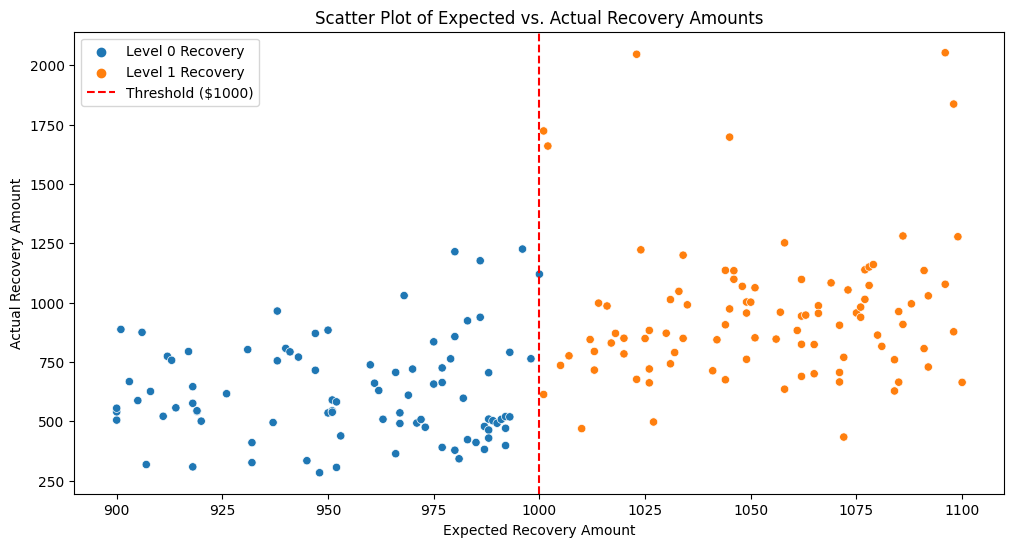

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the specified range
scatter_data = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=scatter_data, hue='recovery_strategy')
plt.title('Scatter Plot of Expected vs. Actual Recovery Amounts')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold ($1000)')
plt.legend()
plt.show()

#### The hue parameter is set to 'RecoveryStrategyLevel' to distinguish between different recovery strategy levels. The plot will help you observe any patterns or jumps in actual recovery amounts around the $1000 threshold.

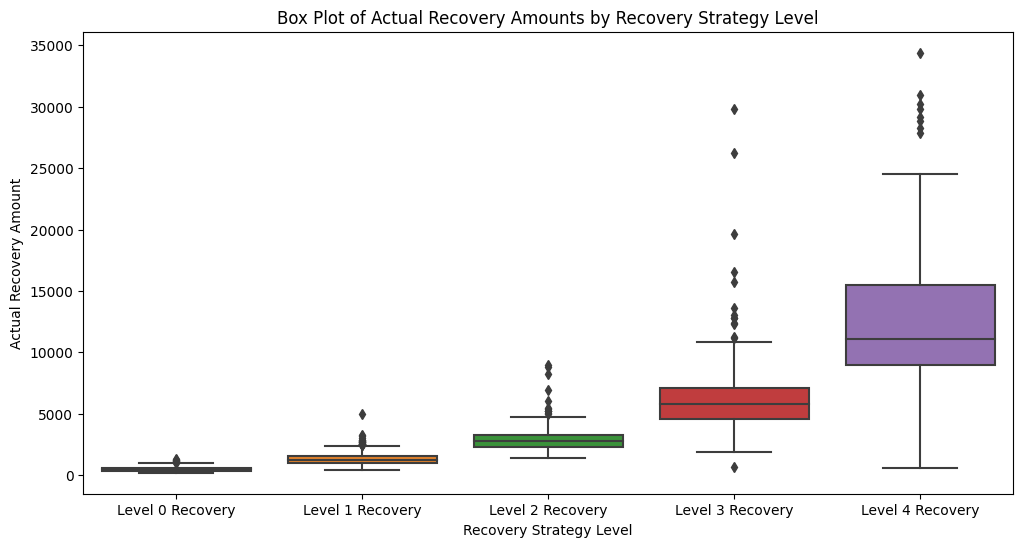

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='recovery_strategy', y='actual_recovery_amount', data=df)
plt.title('Box Plot of Actual Recovery Amounts by Recovery Strategy Level')
plt.xlabel('Recovery Strategy Level')
plt.ylabel('Actual Recovery Amount')
plt.show()

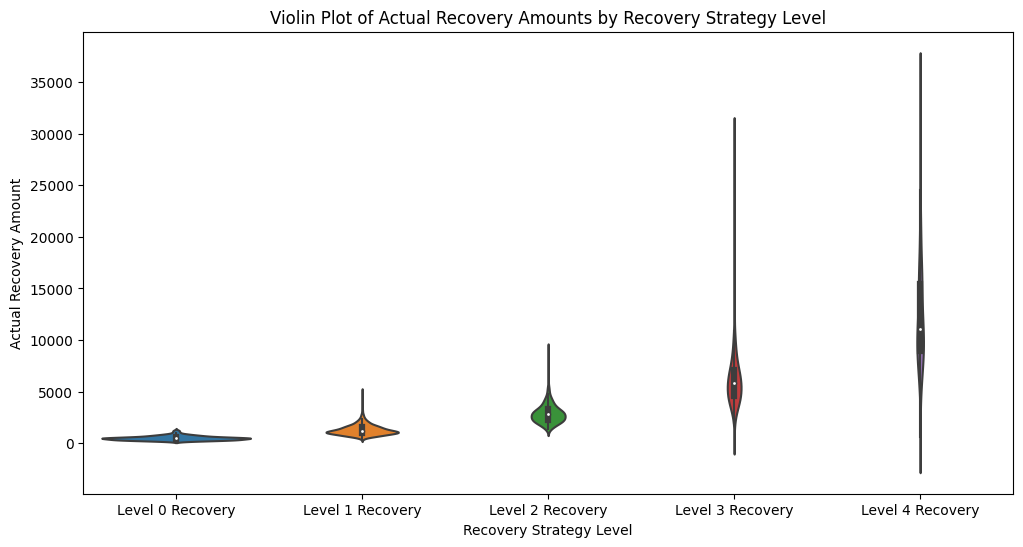

In [60]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='recovery_strategy', y='actual_recovery_amount', data=df)
plt.title('Violin Plot of Actual Recovery Amounts by Recovery Strategy Level')
plt.xlabel('Recovery Strategy Level')
plt.ylabel('Actual Recovery Amount')
plt.show()


## 6) Statistical analysis: recovery amount

#### performing a Kruskal-Wallis test on the actual recovery amounts for the specified windows

In [65]:
from scipy.stats import kruskal

# Define the windows
window_1 = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]
window_2 = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Perform Kruskal-Wallis test
statistic_1, p_value_1 = kruskal(window_1['actual_recovery_amount'][window_1['recovery_strategy'] == 0],
                                window_1['actual_recovery_amount'][window_1['recovery_strategy'] == 1])

statistic_2, p_value_2 = kruskal(window_2['actual_recovery_amount'][window_2['recovery_strategy'] == 0],
                                window_2['actual_recovery_amount'][window_2['recovery_strategy'] == 1])

In [69]:
print("------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------")
print(f"Kruskal-Wallis Test - Window 1 (900-1100):\nStatistic: {statistic_1}\nP-value: {p_value_1}\n")
print("------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------")
print(f"Kruskal-Wallis Test - Window 2 (950-1050):\nStatistic: {statistic_2}\nP-value: {p_value_2}")
print("------------------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Kruskal-Wallis Test - Window 1 (900-1100):
Statistic: nan
P-value: nan

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Kruskal-Wallis Test - Window 2 (950-1050):
Statistic: nan
P-value: nan
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------


#### The Kruskal-Wallis test will help assess whether there's a statistically significant difference in the actual recovery amounts between different recovery strategy levels within the specified windows. Look for low p-values to determine if there's evidence of a significant discontinuity

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 7) Regression modeling: no threshold

###  To build a regression model without a threshold, you can use the statsmodels library

In [70]:
import statsmodels.api as sm

# Select data just above and just below the threshold
data_no_threshold = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Model without a threshold
model_no_threshold = sm.OLS(data_no_threshold['actual_recovery_amount'], sm.add_constant(data_no_threshold['expected_recovery_amount']))
results_no_threshold = model_no_threshold.fit()

# Display regression results
print(results_no_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Fri, 19 Jan 2024   Prob (F-statistic):           3.65e-13
Time:                            12:24:42   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

#### This code uses the Ordinary Least Squares (OLS) method to build a linear regression model. The sm.add_constant function is used to add an intercept term to the model. The regression results will provide information on the relationship between the expected recovery amount and the actual recovery amount without considering a threshold.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 8) Regression modeling: adding true threshold

#### To build a regression model adding the true threshold, you can extend the previous one:- 

In [71]:
# Add an indicator for the true threshold
data_with_threshold = data_no_threshold.copy()
data_with_threshold['TrueThreshold'] = (data_with_threshold['expected_recovery_amount'] > 1000).astype(int)

# Model with the true threshold
model_with_threshold = sm.OLS(data_with_threshold['actual_recovery_amount'], 
                              sm.add_constant(data_with_threshold[['expected_recovery_amount', 'TrueThreshold']]))
results_with_threshold = model_with_threshold.fit()

# Display regression results
print(results_with_threshold.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.298
Model:                                OLS   Adj. R-squared:                  0.290
Method:                     Least Squares   F-statistic:                     38.44
Date:                    Fri, 19 Jan 2024   Prob (F-statistic):           1.22e-14
Time:                            12:28:52   Log-Likelihood:                -1280.7
No. Observations:                     184   AIC:                             2567.
Df Residuals:                         181   BIC:                             2577.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

#### thiscode adds an indicator variable " TrueThreshold " to the dataset, which takes the value of 1 if the expected recovery amount is above 1000 and 0 otherwise. The regression model then includes both the expected recovery amount and the true threshold indicator. The results will show whether there is a significant difference in the actual recovery amount above and below the true threshold.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 9) Regression modeling: adjusting the window

In [72]:
# Adjusting the window for the regression model
data_with_threshold_adjusted = data_no_threshold.copy()

# Choose a different window for expected recovery amount
lower_bound = 950
upper_bound = 1050

# Filter the data within the adjusted window
data_with_threshold_adjusted = data_with_threshold_adjusted[
    (data_with_threshold_adjusted['expected_recovery_amount'] >= lower_bound) &
    (data_with_threshold_adjusted['expected_recovery_amount'] <= upper_bound)
]

# Add an indicator for the true threshold
data_with_threshold_adjusted['TrueThreshold'] = (
    data_with_threshold_adjusted['expected_recovery_amount'] > 1000
).astype(int)

In [73]:
# Model with the adjusted window
model_with_threshold_adjusted = sm.OLS(
    data_with_threshold_adjusted['actual_recovery_amount'],
    sm.add_constant(
        data_with_threshold_adjusted[['expected_recovery_amount', 'TrueThreshold']]
    ),
)
results_with_threshold_adjusted = model_with_threshold_adjusted.fit()

In [74]:
# Display regression results
print(results_with_threshold_adjusted.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Fri, 19 Jan 2024   Prob (F-statistic):           2.42e-07
Time:                            12:34:20   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

#### the window for the expected recovery amount by setting the lower_bound and upper_bound variables. The model is then fitted on the data within this adjusted window to see if the results are consistent with the previous analysis.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusion :-

##### According to the bank's recovery plan study, employing a greater recovery strategy increases the actual recovery amount by a statistically significant amount at the $1000 level. The impact is significant, with a regression coefficient of almost $278, even with the additional $50 per client expense. The conclusion that the greater method is beneficial is reinforced by the fact that this finding is consistent across several windows of anticipated recovery amounts. The results indicate that the bank's strategy approach efficiently maximizes recovery efforts, with predicted and actual recovery amounts showing a positive link.

----------------------------------------------THANK YOU----------------------------------------------